Questo notebook analizza e confronta i risultati delle due implementazioni in MATLAB della decompsizione di Cholesky

La prima fa uso del metodo *chol()*, restituendo la decomposizione, su cui va poi calcolato il sistema lineare, attraverso permutazione delle righe della matrice

La seconda utilizza direttamente la funzione backslash (\\) di MATLAB, che fa uso dietro le quinte della decomposizione di CHolesky se si rende conto che la matrice in input è SDP

Il confronto è stato fatto confrontando le due implementazioni (chol vs \\) su entrambi gli OS 

Non aveva senso confrontare la stessa implementazione (chol vs chol) e (\\ vs \\) sui due diversi OS, in quanto i risulati erano molto simili tra loro, e l'analisi dettagliata per il confronto tra i sistemi operativi è stata già vista nelle analisi MATLAB vs Python

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from Analysis.model.helper import *

import os
from costants import ERROR, NAME, MEMORY, TIME
from Analysis.resources.costants import RESOURCES_DIRECTORY


import sklearn
from sklearn.cluster import KMeans

In [8]:
LEGEND_1 = "Chol Method"
LEGEND_2 = "Backslah Method"

# Data Loading

data = pd.read_csv(os.path.join(RESOURCES_DIRECTORY,"data.csv"))
data_chol = data[(data.Language == 0)]      # just MATLAB data
data_chol_win, data_chol_lin = get_data_sorted("Rows", data_chol)

data_backslash = pd.read_csv(os.path.join(RESOURCES_DIRECTORY,"dataBackslash.csv"))
data_backslash_win, data_backslash_lin = get_data_sorted("Rows", data_backslash)

matrix_names = data_chol_win.Name.tolist()

# Error

Valori di errore praticamente uguali, differenze minime ed impercettibili (per entrambi gli OS)

## Windows

List of errors:
 [] 
 []


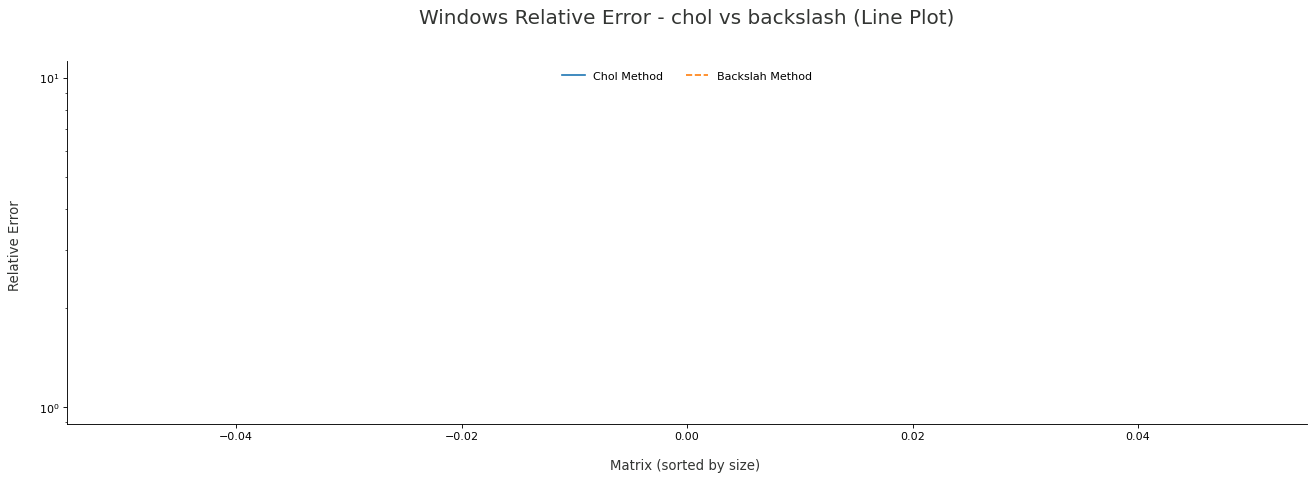

In [9]:
#TODO: NON SI VEDE NIENTE
print("List of errors:\n", data_chol_win["Error"].to_list(), "\n", data_backslash_win["Error"].to_list())
plot(matrix_names, data_chol_win["Error"], data_backslash_win["Error"], NAME, ERROR, "Windows Relative Error - chol vs backslash", LEGEND_1, LEGEND_2, LOG_SCALE=True)

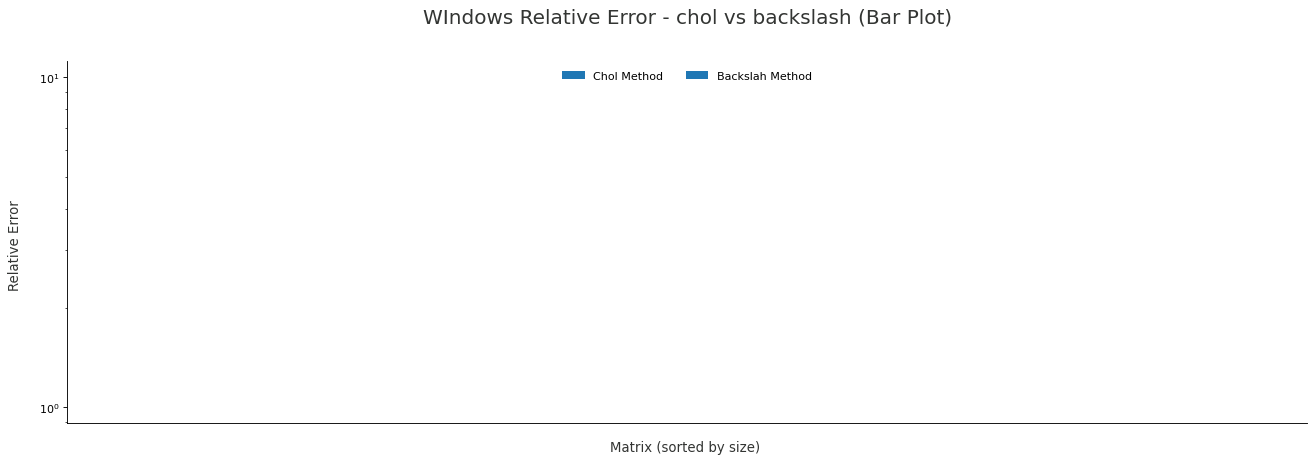

In [10]:
bar_plot(matrix_names, data_chol_win["Error"], data_backslash_win["Error"], NAME, ERROR, "WIndows Relative Error - chol vs backslash", LEGEND_1, LEGEND_2, LOG_SCALE=True)

## Linux

List of errors:
 [6.3482e-07, 6.3482e-07, 1.1359e-13, 1.1359e-13, 2.6728e-16, 2.6728e-16, 3.3486e-13, 3.3486e-13, 1.05e-12, 1.05e-12, 4.3889e-11, 4.3889e-11, 3.5766e-12, 3.5766e-12] 
 [6.4506e-07, 6.4506e-07, 1.0421e-13, 1.0421e-13, 2.3778e-16, 2.3778e-16, 3.6873e-13, 3.6873e-13, 1.0499e-12, 1.0499e-12, 4.3888e-11, 4.3888e-11, 3.5769e-12, 3.5769e-12]


ValueError: x and y must have same first dimension, but have shapes (0,) and (14,)

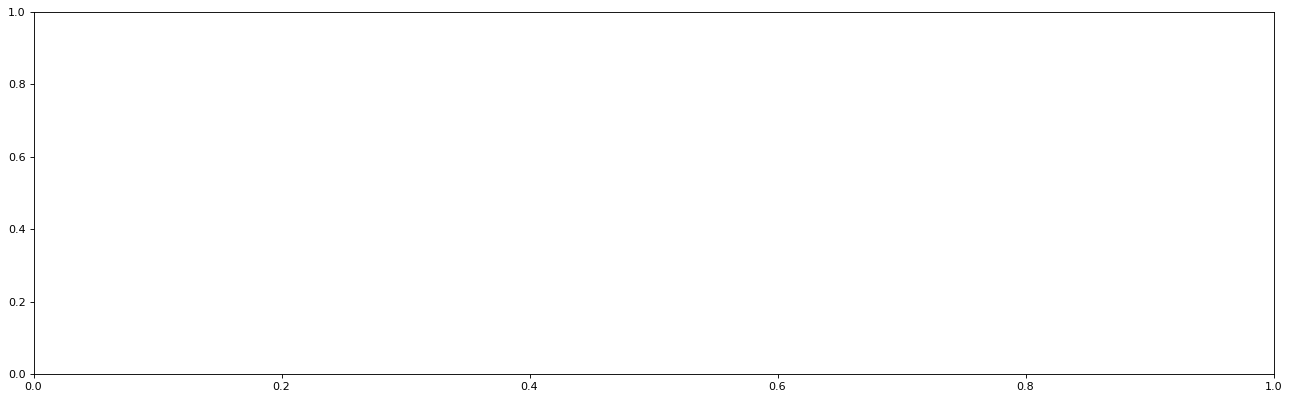

In [11]:
print("List of errors:\n", data_chol_lin["Error"].to_list(), "\n", data_backslash_lin["Error"].to_list())
plot(matrix_names, data_chol_lin["Error"], data_backslash_lin["Error"], NAME, ERROR, "Linux Relative Error - chol vs backslash", LEGEND_1, LEGEND_2, LOG_SCALE=True)

In [ ]:
bar_plot(matrix_names, data_chol_lin["Error"], data_backslash_lin["Error"], NAME, ERROR, "Linux Relative Error - chol vs backslash", LEGEND_1, LEGEND_2, LOG_SCALE=True)

# Memory

Backslah funziona nettamente meglio, il che è dovuto al fatto che probabilmente effettua delle operazioni particolari sulla matrice di decomposizione che ottimizzano l'utilizzo della memoria

## Windows

In [ ]:
print("List of memory usage:\n", data_chol_win["Memory"].to_list(), "\n", data_backslash_win["Memory"].to_list())
plot(matrix_names, data_chol_win["Memory"], data_backslash_win["Memory"], NAME, MEMORY, "Windows Memory Usage - chol vs backslash", LEGEND_1, LEGEND_2)

In [ ]:
bar_plot(matrix_names, data_chol_win["Memory"], data_backslash_win["Memory"], NAME, MEMORY, "Windows Memory Usage - chol vs backslash", LEGEND_1, LEGEND_2)

## Linux

In [ ]:
print("List of memory usage:\n", data_chol_lin["Memory"].to_list(), "\n", data_backslash_lin["Memory"].to_list())
plot(matrix_names, data_chol_lin["Memory"], data_backslash_lin["Memory"], NAME, MEMORY, "Linux Memory Usage - chol vs backslash" , LEGEND_1, LEGEND_2)

In [ ]:
bar_plot(matrix_names, data_chol_lin["Memory"], data_backslash_lin["Memory"], NAME, MEMORY, "Linux Memory Usage - chol vs backslash" , LEGEND_1, LEGEND_2)

# Time


Backslah funziona nettamente meglio, il che è dovuto al fatto che probabilmente effettua delle operazioni particolari sulla matrice di decomposizione che ottimizzano il tempo di esecuzione

## Windows

In [ ]:
print("List of time elapsed:\n", data_chol_win["Time"].to_list(), "\n", data_backslash_win["Time"].to_list())
plot(matrix_names, data_chol_win["Time"], data_backslash_win["Time"], NAME, TIME, "Windows Time Elapsed - chol vs backslash", LEGEND_1, LEGEND_2)

In [ ]:
bar_plot(matrix_names, data_chol_win["Time"], data_backslash_win["Time"], NAME, TIME, "Windows Time Elapsed - chol vs backslash", LEGEND_1, LEGEND_2)

## Linux

In [ ]:
print("List of time elapsed:\n", data_chol_lin["Time"].to_list(), "\n", data_backslash_lin["Time"].to_list())
plot(matrix_names, data_chol_lin["Time"], data_backslash_lin["Time"], NAME, TIME, "Linux Time Elapsed - chol vs backslash" , LEGEND_1, LEGEND_2)

In [ ]:
bar_plot(matrix_names, data_chol_lin["Time"], data_backslash_lin["Time"], NAME, TIME, "Linux Time Elapsed - chol vs backslash" , LEGEND_1, LEGEND_2)